# Support Vector Machine (SVM)

## (a) 
A vector $u$ is normal to the hyperplane if for any vector $v$ in the hyperplane $u^Tv=0$. That is, the dot product between them is 0.

Now, for a point $x_1$ and $x_2$ in the plane $w^{*T}x_i+b^*=0, \: i=1,2$, and the vector $x_1-x_2$ lines in the plane, so

$$
\begin{aligned}
b^* &= -w^{*T}x_1 = -w^{*T}x_2 \\
w^{*T}x_1 + b^{*} &= w^{*T}x_1 - w^{*T}x_2 = 0 \\
w^{*T}(x_1-x_2) &= 0
\end{aligned}
$$

Therefore the unit orthogonal vector is $\frac{w^*}{||w^*||}$

## (b)

For some point $x_0$ that lie on the hyperplane given by $\gamma w^Tx + b = 0$, the distance of the hyperplane from the origin is given by $-\frac{b}{||\gamma w||}$, since

$$
\begin{aligned}
\gamma w^T x_0 + b &= 0 \\
\frac{\gamma w^T x_0}{||\gamma w||} + \frac{b}{||\gamma w||} &= 0 \\
\implies -\frac{b}{||\gamma w||} &= x_0 \cdot \frac{\gamma w}{||\gamma w||}
\end{aligned}
$$

where the right hand side of the equation is the projection of $x_0$ onto the unit vector $\frac{\gamma w^T}{||\gamma w||}$, which is orthogonal to the hyperplane. We can see that transforming $w$ scales the distance of the hyperplane from the origin by $\frac{1}{\gamma}$.

Therefore, $b \rightarrow \gamma b$ would be the required transformation.

## (c) 
The function is $f(x) = sign(w^{*T}x + b^*)$. We are interested in whether the projection of a new feature vector $x_{n+1}$ is beyond the boundary or not. So if $w^{*T}x + b^*\geq 0$ then classify as + and - otherwise.

## (d) 
Denote $x_0$ for a point on the boundary, meaning $w^{*T} x_0 + b = 0$, along with $x_+$ and $x_-$. Then the distance from this feature vector to the hyperplane the projection of the difference of the 2 vectors onto the vector normal to the hyperplane. First, the + class,

$$
\begin{aligned}
Margin_{+} &= \frac{w^{*}}{||w^{*}||} \cdot (x_{+}-x_0) \\
&= \frac{w^{*T}x_{+}}{||w^{*}||} - \frac{w^{*T}x_0}{||w^{*}||}  \\
&= \frac{w^{*T}x_{+}}{||w^{*}||} - \frac{-b}{||w^{*}||}  \\
&= \frac{w^{*T}x_{+} + b}{||w^{*}||} \\
\end{aligned}
$$

$$
\begin{aligned}
Margin_{-} &= \frac{w^{*}}{||w^{*}||} \cdot (x_0 - x_{-}) \\
&= \frac{w^{*T}x_{0}}{||w^{*}||} - \frac{w^{*T}x_-}{||w^{*}||}  \\
&= \frac{-b}{||w^{*}||} - \frac{w^{*T}x_-}{||w^{*}||}  \\
&= \frac{-b - w^{*T}x_{-}}{||w^{*}||} \\
\end{aligned}
$$

## (e) 

From part e, we saw that the distance from the margin to the closest point is $\left|\frac{w^{*}x_{+/-} + b}{||w^{*}||}\right|$. With the given constraints, we can find that $w^{*T}x_{+} = 1-b$ and $w^{*T}x_{-} = -1-b$. Now, the margin for the + sample,

$$
\begin{aligned}
\frac{w^{*}x_{+} + b}{||w^{*}||} &= \frac{1-b + b}{||w^{*}||} \\
&=\frac{1}{||w^{*}||}
\end{aligned}
$$

and for the - sample,

$$
\begin{aligned}
\frac{-b-w^{*}x_{-}}{||w^{*}||} &= \frac{-b-(-1-b)}{||w^{*}||} \\
&=\frac{1}{||w^{*}||}
\end{aligned}
$$

So they are equidistant from the decision boundary.

$$
\begin{aligned}
\max_{w} \frac{1}{||w||} &= \min_{w} ||w|| = \frac{1}{2}||w||^2\\ \\
&\min_{w} \frac{1}{2}w^Tw \\
&\text{subj. to } y_i(w^Tx_i+b)-1 \geq 0 \quad \forall i
\end{aligned}
$$


The closest (minimum) distance to the decision boundary is $\frac{1}{||w||}$. We want to maximize this quantity. Therefore, we want to minimize $||w||$, subject to the given tight constraints. From the problem, $w^*, b^*$ maximizes the minimum distance. Therefore, those are exactly the solutions to this problem.


## (f)
No, we don't expect the randomly selected training points with opposite labels to be equidistant from the decision boundary. This is because the decision boundary is chosen based on the nearest positive and negative points (i.e the support vectors). Randomly choosing the training points will not necessarily give us these points.

## (g)

If we add iid unbiased bounded random noise to each feature vector, then **on average**, the decision boundary will not change. This is because the noise is unbiased $E(\epsilon)=0$. The noise can perhaps change what the support vectors are. However, if we fit multiple versions of the data generated in this fashion, the average decision boundary will be the same as if the noise was not added in since the noisy effects will be averaged to 0.

## Kernel Methods

In [1]:
import scipy.stats as stats
import numpy as np
np.random.seed(100)
plus_train = stats.multivariate_normal.rvs(mean=[1,1], cov=[[1,0],[0,1]], size=1000)
minus_train = stats.multivariate_normal.rvs(mean=[-1,-1], cov=[[3,0],[0,3]], size=1000)
train = np.concatenate((plus_train,minus_train))
plus_test = stats.multivariate_normal.rvs(mean=[1,1], cov=[[1,0],[0,1]], size=1000)
minus_test = stats.multivariate_normal.rvs(mean=[-1,-1], cov=[[3,0],[0,3]], size=1000)
test = np.concatenate((plus_test,minus_test))

labels = [1] * 1000 + [-1] * 1000

### (a)

<Figure size 432x288 with 0 Axes>

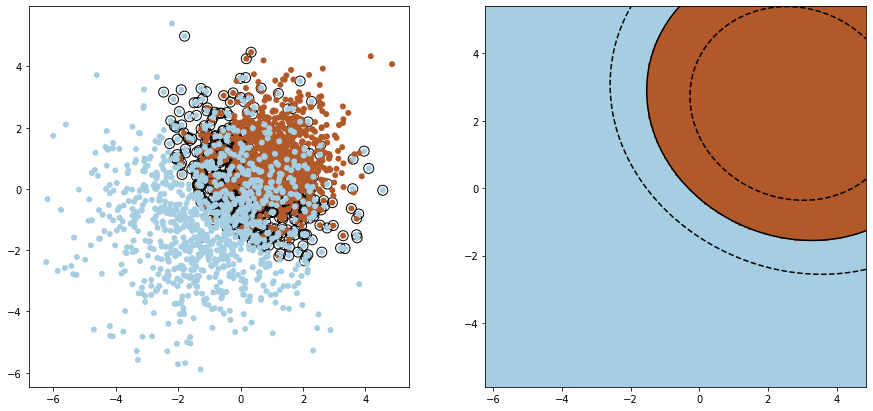

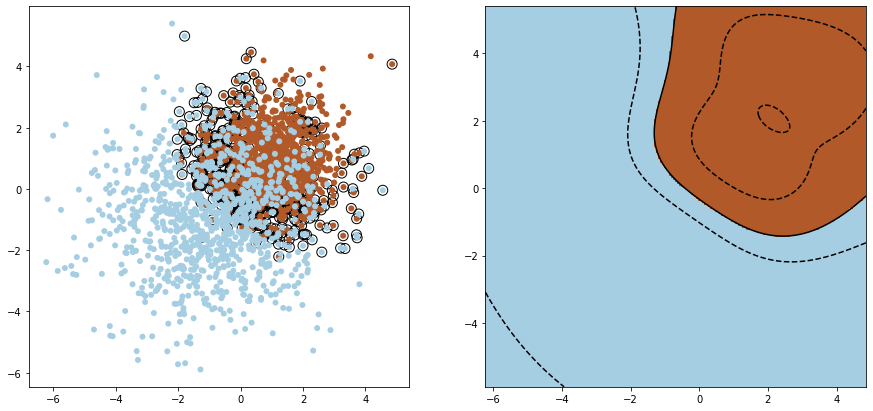

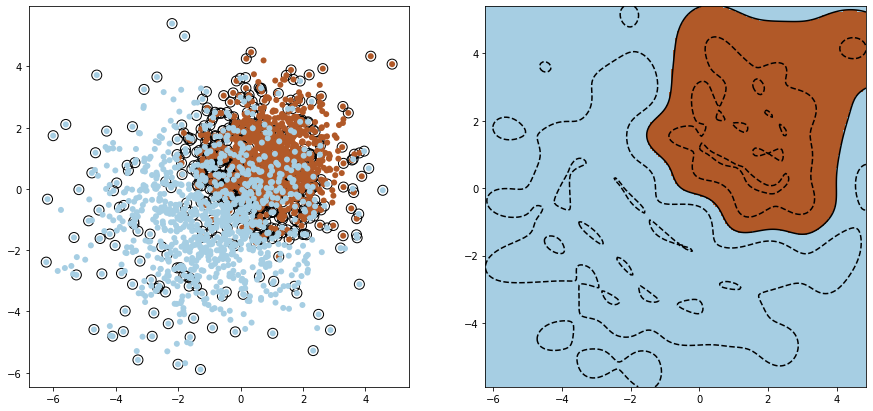

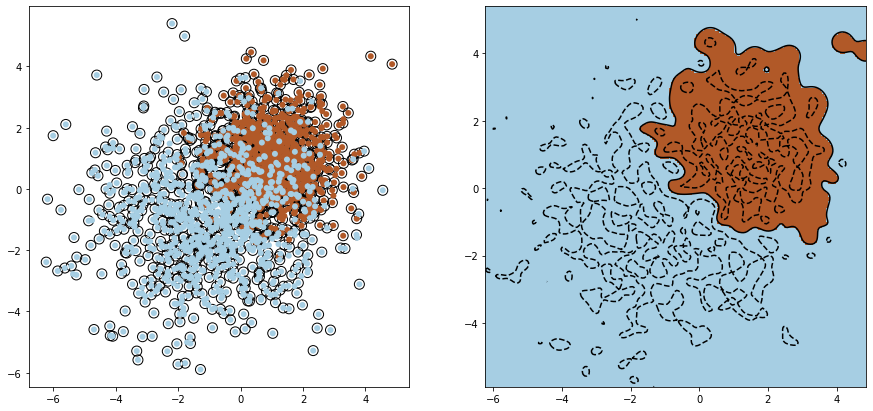

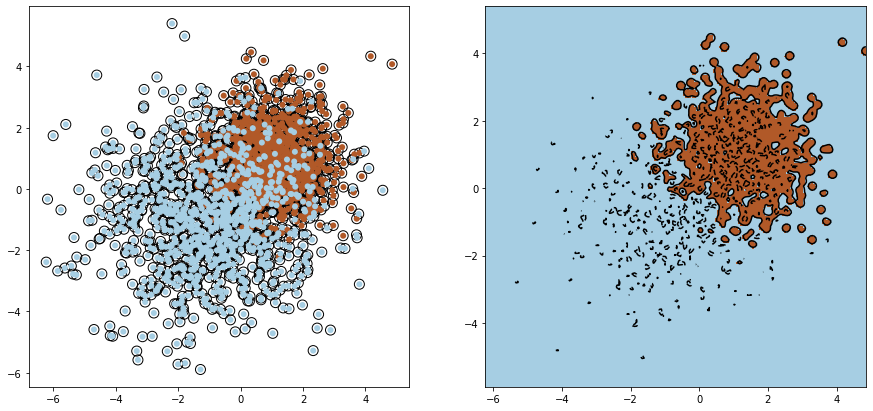

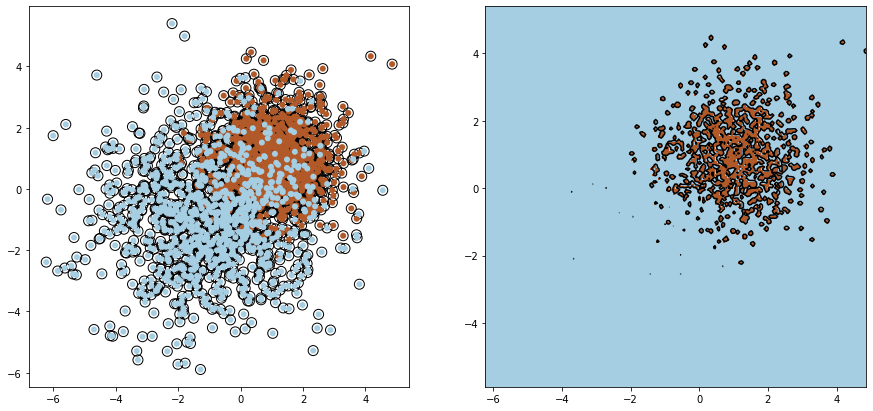

In [2]:
import matplotlib.pyplot as plt
from sklearn import svm
% matplotlib inline
gamma = [0.01,0.1,1,10,100,1000]
a_accuracy = []
a_num_sv = []
plt.clf()
for i in gamma:
    k = 0
    svm_a = svm.SVC(C=1, kernel="rbf", gamma=i)
    svm_a.fit(train,labels)
    
    fig, ax = plt.subplots(1,2,figsize=(15,7))
    # Plot the support vectors

    ax[k].scatter(svm_a.support_vectors_[:, 0], svm_a.support_vectors_[:, 1], s=100,
                facecolors='none', zorder=10, edgecolors='k')
    ax[k].scatter(train[:, 0], train[:, 1], c=labels, zorder=10, cmap=plt.cm.Paired, edgecolors='none')
    x_min = train[:,0].min()
    x_max = train[:,0].max()
    y_min = train[:,1].min()
    y_max = train[:,1].max()
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = svm_a.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Plot the decision boundaries
    Z = Z.reshape(XX.shape)
    ax[k+1].pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired, shading="auto")
    ax[k+1].contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-1, 0, 1])
    ax[k+1].set_xlim([x_min, x_max])
    ax[k+1].set_ylim([y_min, y_max])
    
    a_accuracy.append(svm_a.score(test, labels))
    a_num_sv.append(svm_a.support_vectors_.shape[0])
    k+=2

In [3]:
a_num_sv

[792, 665, 724, 1261, 1764, 1990]

From the RBF documentation, we know that gamma controls the influence of a training example in being selected as support vectors, with a low value meaning that the example has a far reaching influence and a high value meaning close. So for a low gamma, we expect a low number of support vectors, because of the training example's larger influence. This is reflected in the plots above and the array output, where in the beginning, with low values of gamma, a subset of points are used as support vectors (points circled in black). As gamma increases, in general, more and more support vectors are used, and the decision boundary gets more complicated, as seen in the right column of plots. With $\gamma=1000$, almost all of the training examples are used.

In [4]:
a_accuracy

[0.866, 0.866, 0.855, 0.854, 0.818, 0.6865]

The highest accuracy corresponded to $\gamma=0.01$, which gave the simplest decision boundary. The accuracy decreased as gamma increased, which is clearly due to overfitting the data. In the last plot on the right, we can see that it is trying to fit each point exactly in the training data, so it did not perform as well on the test data.

## (b)

<Figure size 432x288 with 0 Axes>

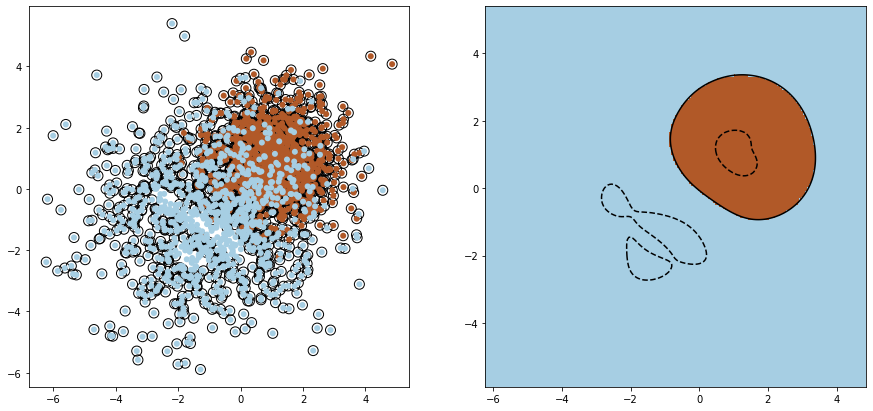

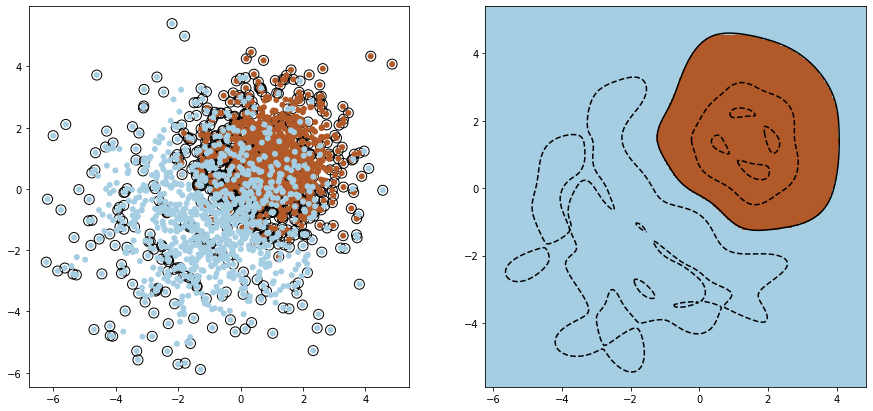

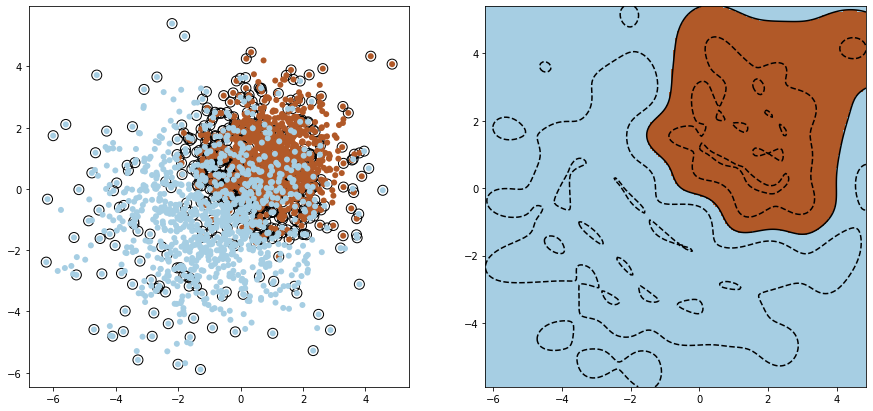

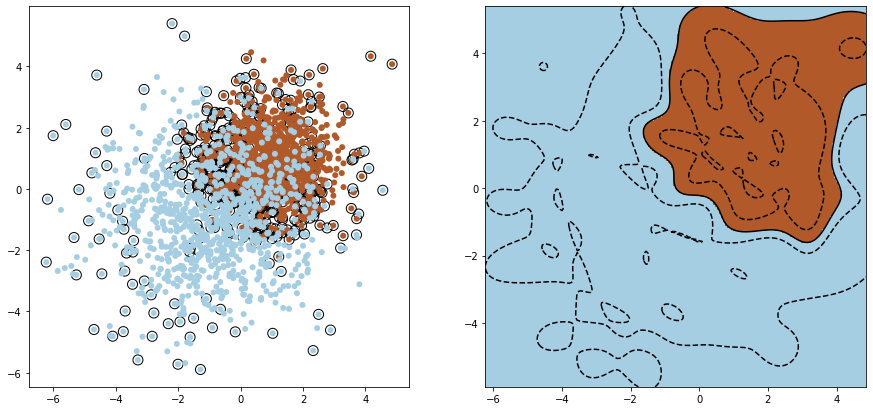

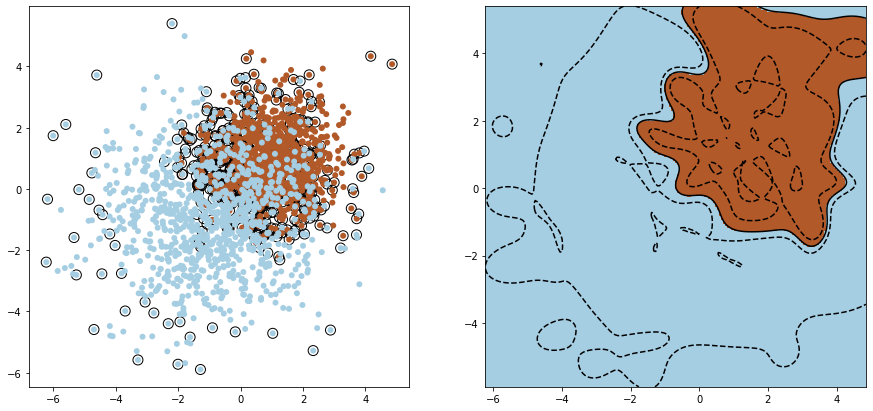

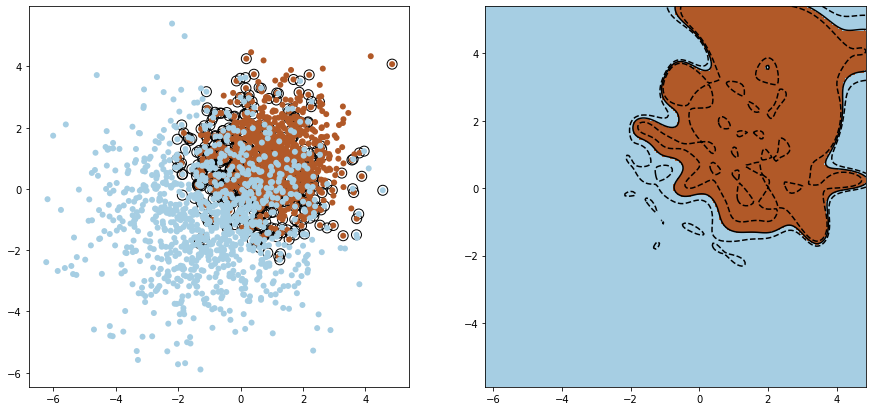

In [5]:
import matplotlib.pyplot as plt
from sklearn import svm
plt.clf()
C = [0.01,0.1,1,10,100,1000]
b_accuracy = []
b_num_sv = []
for i in C:
    k = 0
    svm_b = svm.SVC(C=i, kernel="rbf", gamma=1)
    svm_b.fit(train,labels)
    
    fig, ax = plt.subplots(1,2,figsize=(15,7))
    # Plot the support vectors

    ax[k].scatter(svm_b.support_vectors_[:, 0], svm_b.support_vectors_[:, 1], s=100,
                facecolors='none', zorder=10, edgecolors='k')
    ax[k].scatter(train[:, 0], train[:, 1], c=labels, zorder=10, cmap=plt.cm.Paired, edgecolors='none')
    x_min = train[:,0].min()
    x_max = train[:,0].max()
    y_min = train[:,1].min()
    y_max = train[:,1].max()
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = svm_b.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Plot the decision boundaries
    Z = Z.reshape(XX.shape)
    ax[k+1].pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired, shading="auto")
    ax[k+1].contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-1, 0, 1])
    ax[k+1].set_xlim([x_min, x_max])
    ax[k+1].set_ylim([y_min, y_max])
    
    b_accuracy.append(svm_b.score(test, labels))
    b_num_sv.append(svm_b.support_vectors_.shape[0])
    k+=2

In [6]:
b_num_sv

[1689, 902, 724, 681, 662, 618]

C controls the slack, trading off correct classification for maximizing the decision function's margin. With a small value of C, it will come up with a larger margin, but accuracy will decrease. For higher values of C, the margin will be smaller but accuracy will increase. It can also be thought of a regularization parameter.

For the first few plots, we can see that we use more support vectors because of the lower value of C. The support vectors are the training examples that lie on the margin boundaries, within the margin region, or are on the wrong side of the hyperplane. This is the same thing as trading off correct classification for maximizing the margin as it says on the documentation.

As C increases, there is a greater penalty for an incorrect classification, so the decision rule becomes less simple, as we can see in the plots. There will be fewer support vectors due to the margin being smaller and fewer satisfying the characteristics listed above.

In [7]:
b_accuracy

[0.858, 0.8625, 0.855, 0.8545, 0.8525, 0.855]

Interestingly, the accuracy did not change very much. Theoretically, it should go from lower to higher. We can see from the decision rule that the overall shape did not change as much, and mostly classifies points on the upper right corner as -. This contrasts with when we changed gamma, in which a larger value caused overfitting and a lower accuracy.

## (c)

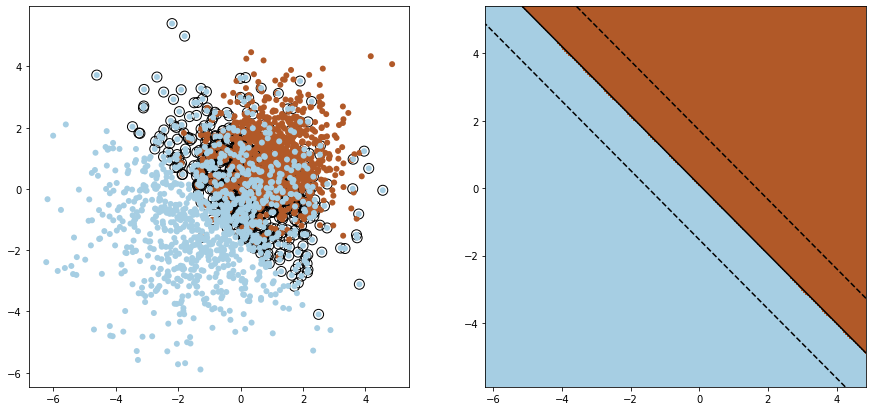

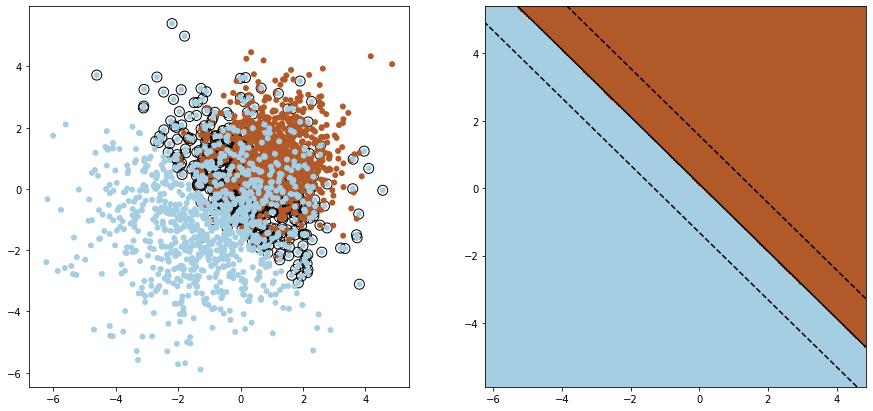

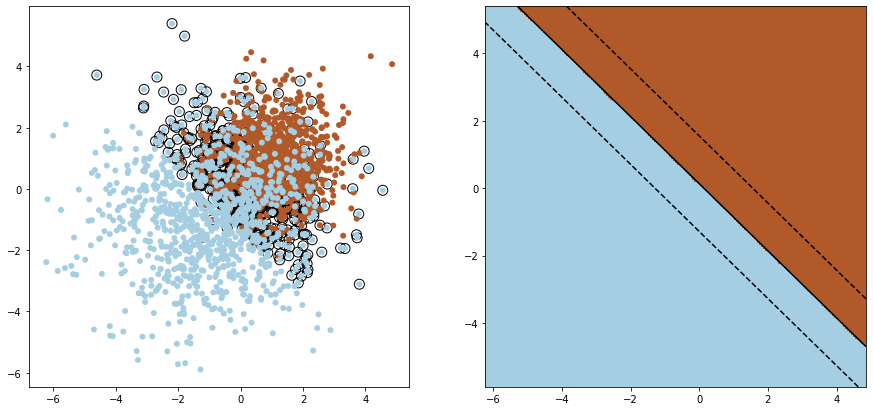

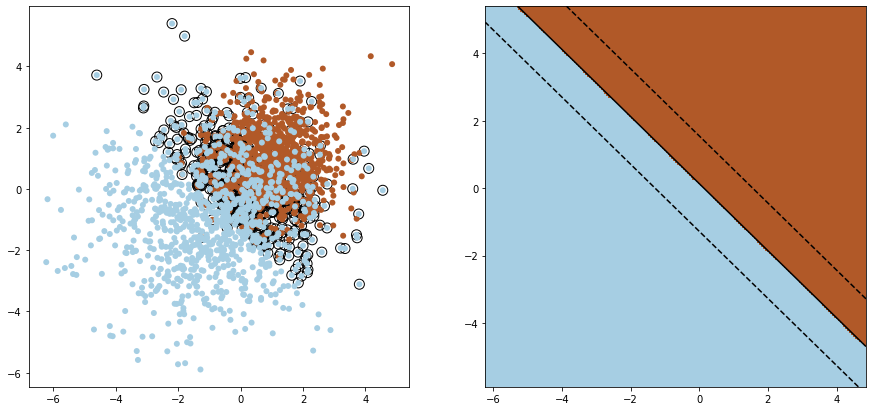

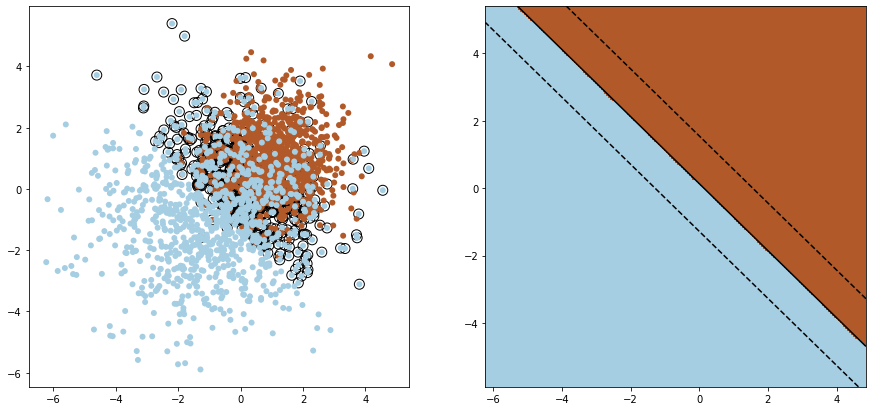

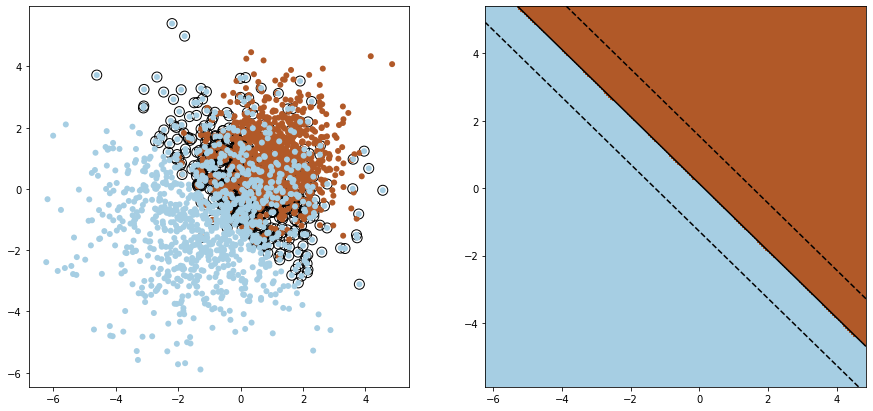

In [8]:
import matplotlib.pyplot as plt
from sklearn import svm

C = [0.01,0.1,1,10,100,1000]
c_accuracy = []
c_num_sv = []
for i in C:
    k = 0
    svm_c = svm.SVC(kernel="linear",C=i)
    svm_c.fit(train,labels)
    
    fig, ax = plt.subplots(1,2,figsize=(15,7))
    # Plot the support vectors

    ax[k].scatter(svm_c.support_vectors_[:, 0], svm_c.support_vectors_[:, 1], s=100,
                facecolors='none', zorder=10, edgecolors='k')
    ax[k].scatter(train[:, 0], train[:, 1], c=labels, zorder=10, cmap=plt.cm.Paired, edgecolors='none')
    x_min = train[:,0].min()
    x_max = train[:,0].max()
    y_min = train[:,1].min()
    y_max = train[:,1].max()
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = svm_c.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Plot the decision boundaries
    Z = Z.reshape(XX.shape)
    ax[k+1].pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired, shading="auto")
    ax[k+1].contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-1, 0, 1])
    ax[k+1].set_xlim([x_min, x_max])
    ax[k+1].set_ylim([y_min, y_max])
    
    c_accuracy.append(svm_c.score(test, labels))
    c_num_sv.append(svm_c.support_vectors_.shape[0])
    k+=2
    

In [9]:
c_num_sv

[864, 791, 782, 781, 781, 781]

With a linear kernel, the penalty did not seem to the model too much overall. Unlike with the RBF kernel, the linear kernel used a much fewer number of support vectors with C=0.01, which decreased only by 70 or so by C=1000. We can see this looking at the decision boundary and the support vectors, which did not seem to change much at all.

In [10]:
c_accuracy

[0.853, 0.853, 0.8535, 0.8535, 0.8535, 0.8535]

The accuracy is mostly the same with changing C, like in the RBF kernel, for a similar reason. The upper right hand corner does contain most points for the negative label, as we generated them from a multivariate Gaussian with mean vector 3,3.